## Import Modules

In [19]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [7]:
paths = []
labels = []
for dirname, _, filenames in os.walk('TESS'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [8]:
len(paths)  # total number of audio file

2800

In [9]:
paths[:5]

['TESS/YAF_disgust/YAF_date_disgust.wav',
 'TESS/YAF_disgust/YAF_rag_disgust.wav',
 'TESS/YAF_disgust/YAF_raise_disgust.wav',
 'TESS/YAF_disgust/YAF_ditch_disgust.wav',
 'TESS/YAF_disgust/YAF_door_disgust.wav']

In [10]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [11]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,TESS/YAF_disgust/YAF_date_disgust.wav,disgust
1,TESS/YAF_disgust/YAF_rag_disgust.wav,disgust
2,TESS/YAF_disgust/YAF_raise_disgust.wav,disgust
3,TESS/YAF_disgust/YAF_ditch_disgust.wav,disgust
4,TESS/YAF_disgust/YAF_door_disgust.wav,disgust


In [12]:
df['label'].value_counts()

label
disgust    400
ps         400
happy      400
sad        400
neutral    400
fear       400
angry      400
Name: count, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

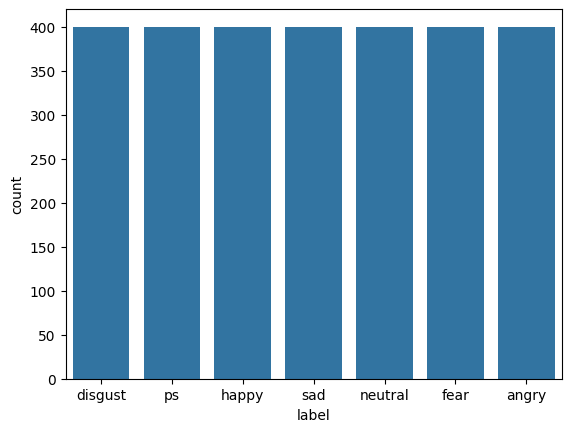

In [13]:
sns.countplot(data=df, x='label')

In [22]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr, color="blue")  # visualize wave in the time domain
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)  # frequency domain: The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows.
    xdb = librosa.amplitude_to_db(abs(x))  # Convert an amplitude spectrogram to dB-scaled spectrogram.
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')  # visualize wave in the frequency domain
    plt.colorbar()

TESS/OAF_Fear/OAF_third_fear.wav


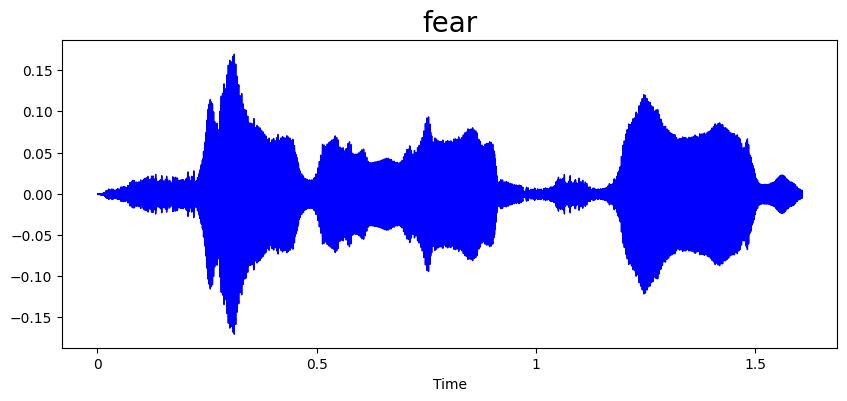

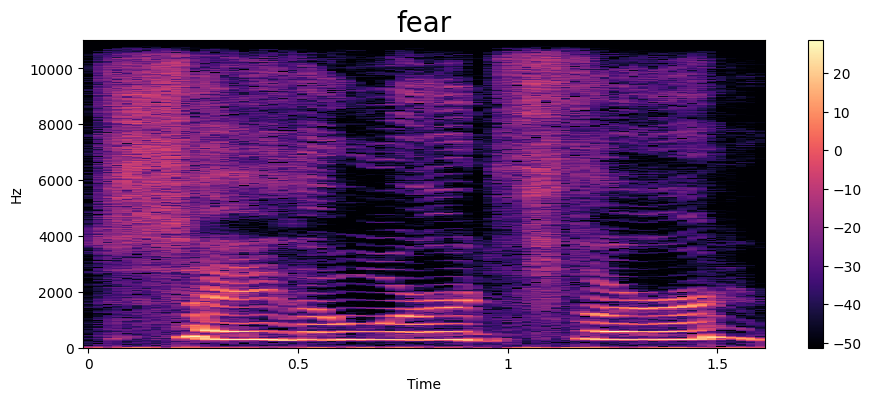

In [23]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
print(path)
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

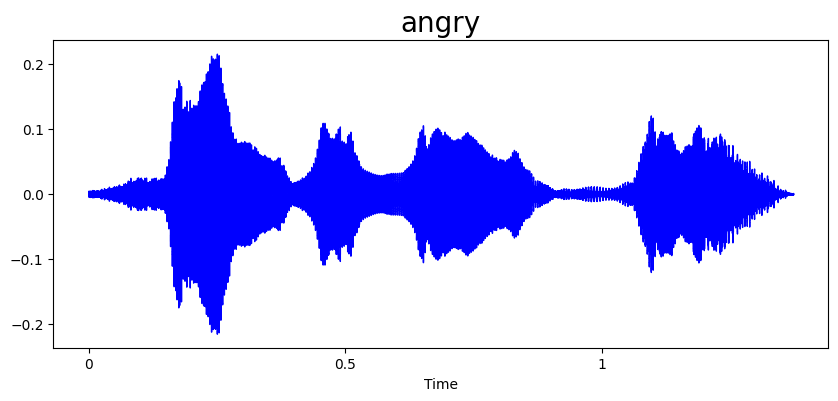

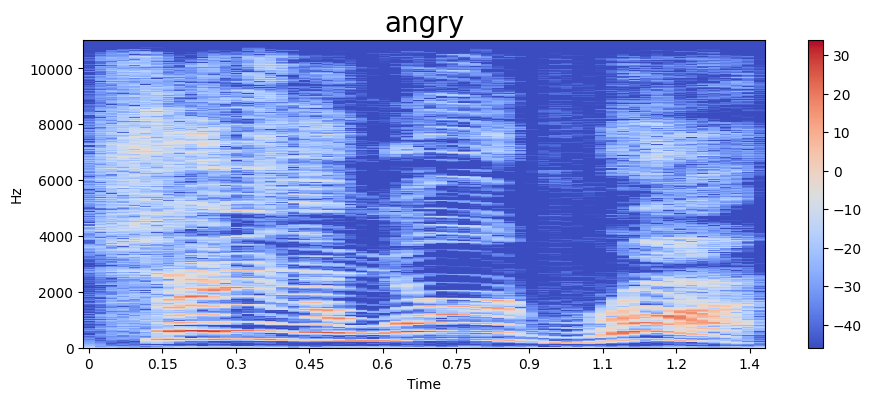

In [24]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

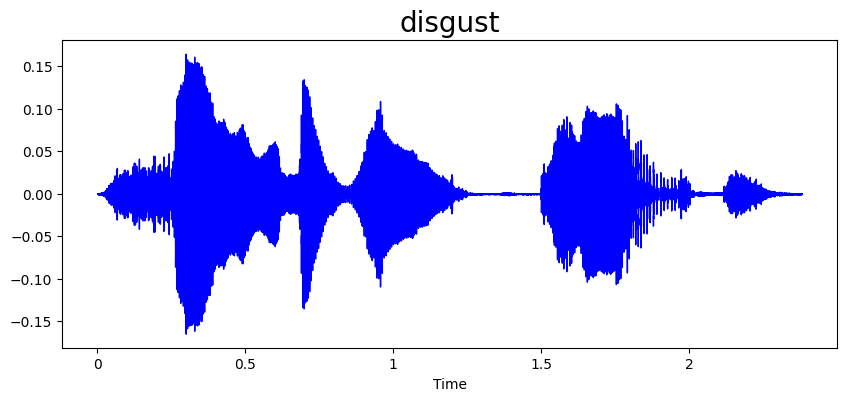

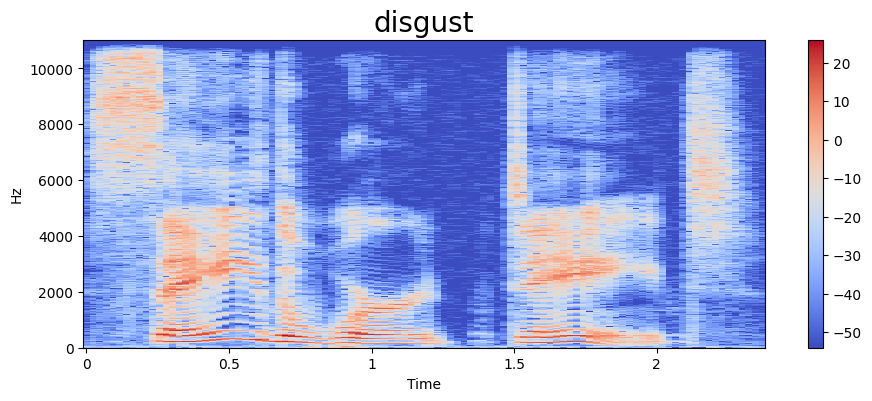

In [25]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

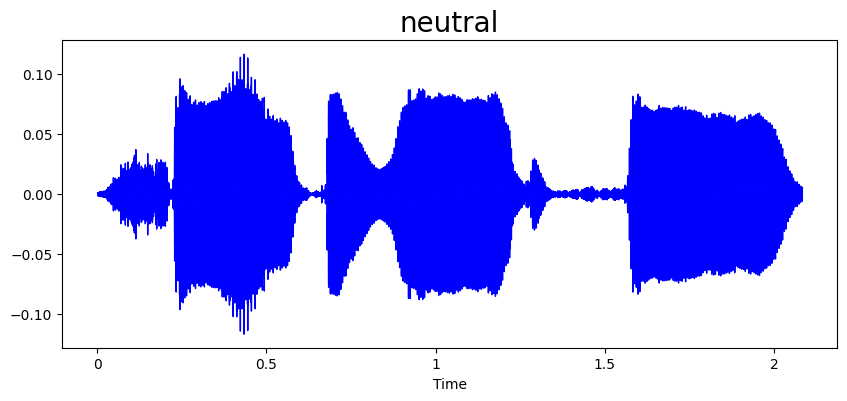

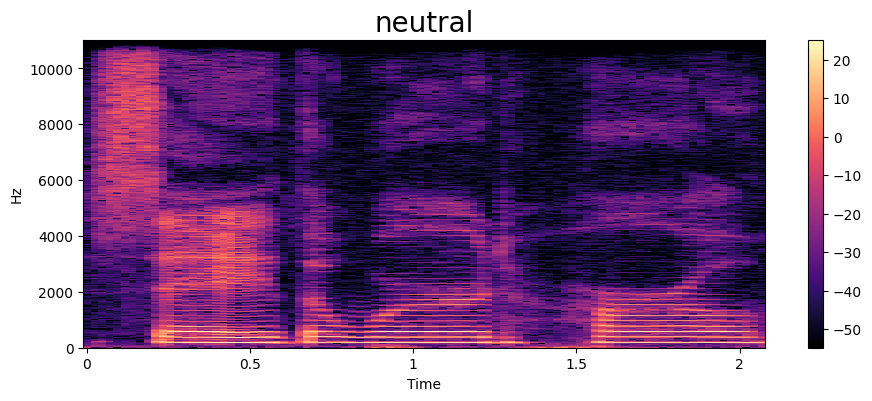

In [26]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

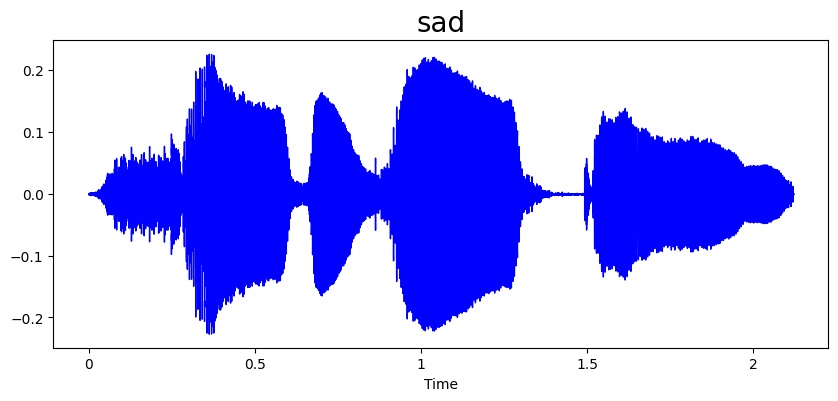

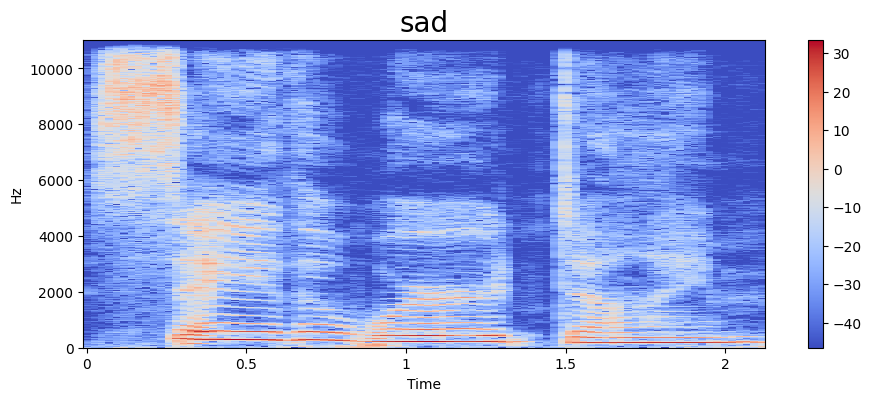

In [27]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

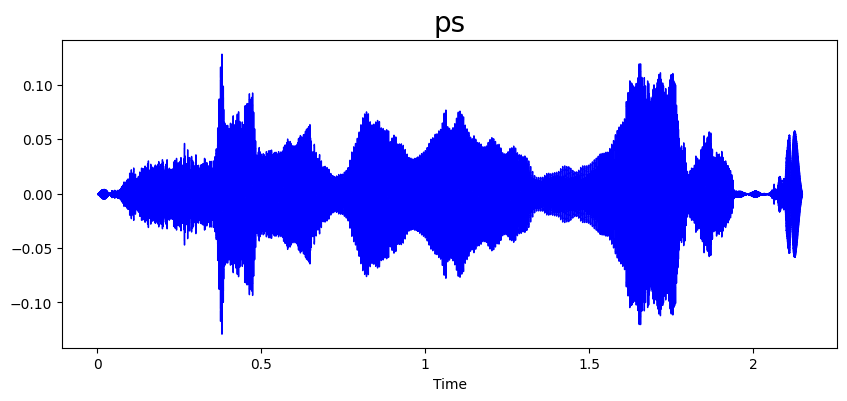

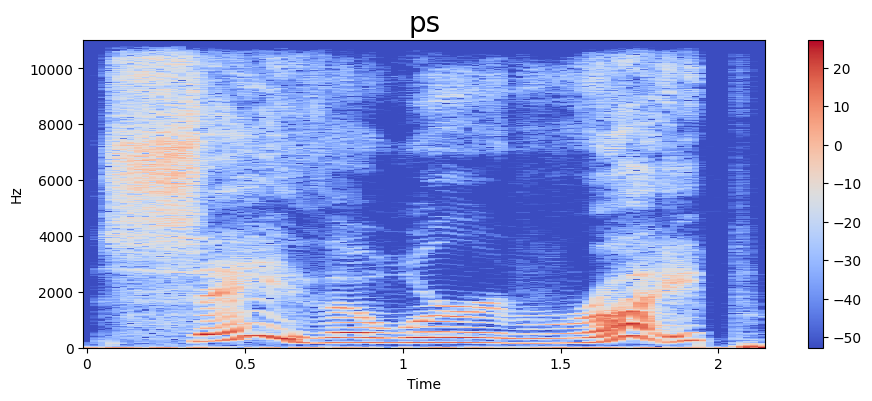

In [28]:
emotion = 'ps'  # pleasant
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

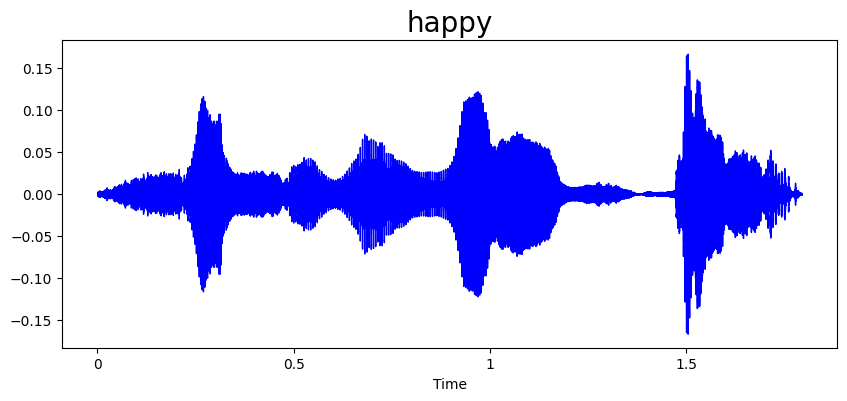

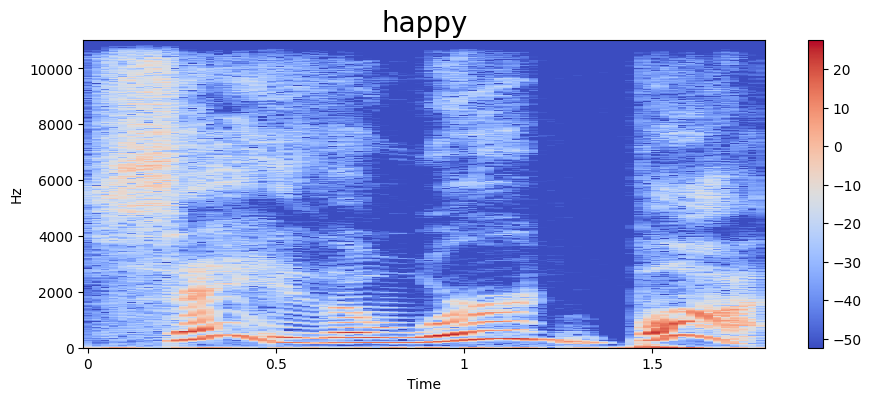

In [29]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [36]:
# mfcc spectrum features
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    # time series, sampling rate, number of mfcc returned
    # print(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).shape)  # (40,81)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)  # get mean value of the whole audio
    return mfcc

In [37]:
extract_mfcc(df['speech'][0])

array([-4.4636795e+02,  7.3789307e+01,  1.5521696e+00,  4.0626900e+01,
       -8.4494524e+00, -2.9341416e+00, -6.6822000e+00, -1.7199314e+01,
       -5.6114135e+00, -1.3409514e+01, -7.3893261e+00,  6.8370895e+00,
       -1.0458899e+01,  3.2033212e+00, -1.0037674e+00, -5.6148558e+00,
        4.2504153e+00, -1.1169617e+00, -9.1154394e+00,  2.1831026e+00,
       -7.7419305e+00,  6.4608294e-01, -3.6939983e+00,  3.7297693e-01,
       -2.0016904e+00, -1.8217641e+00, -2.7837276e+00,  2.8430924e+00,
       -3.0322764e+00,  4.5028725e+00, -8.8744301e-01,  4.2168245e+00,
        1.7408373e+00,  3.8251708e+00,  4.3130198e+00,  3.1095667e+00,
        3.5192728e+00,  4.1317425e+00,  2.2578516e+00,  2.3055406e+00],
      dtype=float32)

In [38]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [39]:
X_mfcc

0       [-446.36795, 73.78931, 1.5521696, 40.6269, -8....
1       [-383.37564, 108.15568, -17.578178, 15.888102,...
2       [-404.0382, 87.21107, 0.48701477, 22.224407, -...
3       [-444.80597, 67.52622, -3.8089025, 31.318571, ...
4       [-430.42755, 118.75985, 6.9652753, 5.20493, -8...
                              ...                        
2795    [-574.7826, 95.66921, 34.85123, 16.821646, 17....
2796    [-557.9271, 89.87658, 33.66148, 15.339763, 22....
2797    [-527.0877, 115.282486, 26.172379, 7.626841, 1...
2798    [-560.78094, 121.28373, 40.30248, -1.9568887, ...
2799    [-552.68384, 106.72334, 35.172707, 8.06072, 22...
Name: speech, Length: 2800, dtype: object

In [40]:
X = [x for x in X_mfcc]  # convert into list and np array
X = np.array(X)
X.shape  # 40 features of mfcc for each audio

(2800, 40)

In [41]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [42]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])  # convert label into one-hot encoding

In [43]:
y = y.toarray()

In [45]:
y.shape
print(y[:10])

[[0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]]


## Create the LSTM Model

In [46]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),  # 40 features as 40 timestamp, for each timestamp the input dimension is 1
    # output vector dimension is 256
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [47]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 4s 99ms/step - loss: 1.1150 - accuracy: 0.5571 - val_loss: 1.2078 - val_accuracy: 0.5714
Epoch 2/50
35/35 [==============================] - 3s 87ms/step - loss: 0.3817 - accuracy: 0.8527 - val_loss: 2.1365 - val_accuracy: 0.5304
Epoch 3/50
35/35 [==============================] - 3s 89ms/step - loss: 0.1866 - accuracy: 0.9420 - val_loss: 2.1595 - val_accuracy: 0.4000
Epoch 4/50
35/35 [==============================] - 3s 85ms/step - loss: 0.1341 - accuracy: 0.9634 - val_loss: 1.7973 - val_accuracy: 0.5964
Epoch 5/50
35/35 [==============================] - 3s 95ms/step - loss: 0.1302 - accuracy: 0.9594 - val_loss: 1.5773 - val_accuracy: 0.6179
Epoch 6/50
35/35 [==============================] - 3s 97ms/step - loss: 0.1038 - accuracy: 0.9714 - val_loss: 1.0965 - val_accuracy: 0.7071
Epoch 7/50
35/35 [==============================] - 3s 90ms/step - loss: 0.0949 - accuracy: 0.9719 - val_loss: 3.0836 - val_accuracy: 0.3375
Epoch 8/50
35

In [ ]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

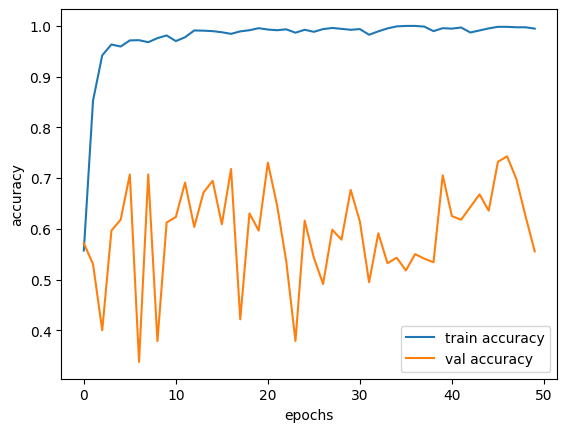

In [48]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

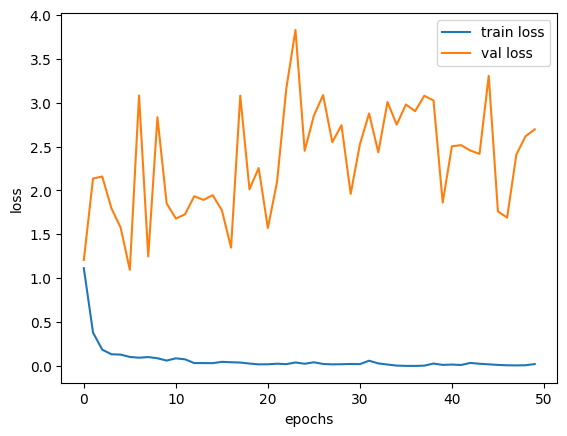

In [49]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()